# Приоритизация гипотез, запуск A/B-теста и анализ результата

## Описание задачи  
Вместе с отделом маркетинга подготовлен список гипотез для увеличения выручки.  
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результат.  
**Часть 1. Приоритизация гипотез.**
В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.
**Задача** 
- Применить фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
- Как изменилась приоритизация гипотез при применении RICE вместо ICE.  

Файл `/datasets/hypothesis.csv.` состоит из  
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. 

**Часть 2. Анализ A/B-теста**  
Провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv.`  
**Задача**
- Проанализировать A/B-тест
- Принять решение по результатам теста и объяснить его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.  

Файл `/datasets/orders.csv.`состоит из  
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.
Файл /datasets/visitors.csv.  
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

## Часть 1. Приоритизация гипотез.

В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `onfidence`, `Effort`

In [4]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import scipy.stats as stats

In [5]:
# зададим дефолтные настройки отображения таблиц и графиков
pd.set_option('display.float_format', '{:_.3f}'.format)
pd.set_option('display.max_rows', 50)
plt.rcParams['font.size'] = '12'
plt.rcParams['figure.figsize'] = (15, 8)

### Загружаем данные

In [6]:
# считываем файл с данными
try:
    df_hypothesis = pd.read_csv('hypothesis.csv')
except:
    df_hypothesis = pd.read_csv('/datasets/hypothesis.csv')

Согласно документации у нас 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`  

- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [7]:
# устанавливаем большую ширину столбца для вывода полными строками гипотиз без сокращений
pd.set_option('max_colwidth', 120)
df_hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

Будем считать по формуле $$ICE = \frac{Impact * Confidence}{Efforts}$$

In [8]:
df_hypothesis['ICE'] = (df_hypothesis.Impact * df_hypothesis.Confidence) / df_hypothesis.Efforts
ice = df_hypothesis.sort_values(by='ICE', ascending=False)
display(ice)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000


### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

Считаем RICE по формуле $$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [9]:
df_hypothesis['RICE'] = (df_hypothesis.Reach * df_hypothesis.Impact * df_hypothesis.Confidence) \
                        / df_hypothesis.Efforts
rice = df_hypothesis.sort_values(by='RICE', ascending=False)
display(rice)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200,112.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000,56.000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333,40.000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000,40.000
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200,16.200
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125,9.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000,4.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333,4.000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000,3.000


In [10]:
# функция для добавления цвета линии в датафрейм для использования в дальнейшем графике
#  изменения приоритета гипотиз по методологиям
def color_place(df):
    if df['place_ice'] < df['place_rice']:
        return 'green'
    elif df['place_ice'] == df['place_rice']:
        return 'grey'
    else:
        return 'red'

In [11]:
# добавляем колонки мест приоритета по методологиям от самой приоритетной к наименее
rice['place_rice'] = np.arange(10, 1, -1)
ice['place_ice'] = np.arange(10, 1, -1)

# добавляем в одну таблицы занятые места по методологиям среди гипотинуз
df_hypothesis_all = df_hypothesis.merge(ice[['Hypothesis', 'place_ice']], on='Hypothesis')\
                                 .merge(rice[['Hypothesis', 'place_rice']], on='Hypothesis')

# добавляем столбец с цветом согласно изменению занятого места по приоритетц гипотизы от перехода 
# метода ICE к методу RICE 
df_hypothesis_all['color'] = df_hypothesis_all.apply(color_place, axis=1)
# оставляем столбцы для построения графика изменения приоритета по методологиям
df_hypothesis_all = df_hypothesis_all[['Hypothesis','place_ice', 'place_rice', 'color']]

0              Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
1                                       Запустить собственную службу доставки, что сократит срок доставки заказов
2    Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3             Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
4                                Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
5                        Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
6            Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
7                Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
8                                                         Запустить акцию, дающую скидку

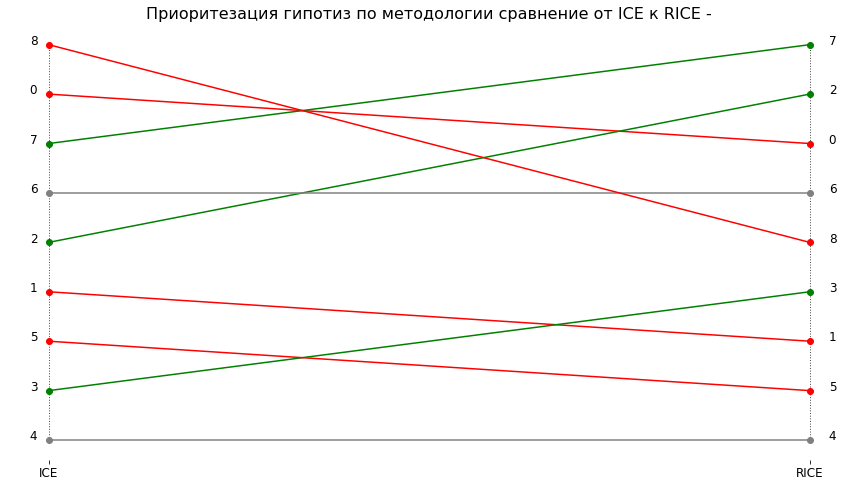

In [12]:
fig, ax = plt.subplots(1,1,figsize=(15,8))

x1, x2 = 1, 3
# рисуем две вертикальные линии, которые будут линией ICE и линией RICE
ax.vlines(x=x1, ymin=20, ymax=100, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=x2, ymin=20, ymax=100, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# рисуем для каждой гипотизы линию изменения по методологиям от ICE к RICE
for key in range(len(df_hypothesis_all)):
# выбираем по key гипотизу по номеру, получаем значения по оси y как значение по приоритету метода
# умноженному на 10 по каждой линии метода
    x, y = [x1, x2], [df_hypothesis_all.loc[key][1] * 10, df_hypothesis_all.loc[key][2] * 10]
    plt.plot(x, y, marker = 'o', color = df_hypothesis_all.loc[key][3])
# указываем номер гипотизы возле каждой из точек соединяющей линию гипотизы по методам между собой
    ax.text(x1-0.05, df_hypothesis_all.loc[key][1] * 10, key, fontdict={'size':12})
    ax.text(x2+0.05, df_hypothesis_all.loc[key][2] * 10, key, fontdict={'size':12})
       
ax.set_title("Приоритезация гипотиз по методологии сравнение от ICE к RICE -", fontdict={'size':16})

ax.set_xticks([x1, x2])
# указываем названия гипотиз по вертикальныи линиям
ax.set_xticklabels(["ICE", "RICE"])
plt.yticks([])
# убираем все линии фигуры графика
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
# вывожу названия гипотиз с их номерами для того, чтобы можно было состыковать номера гипотиз с их
# названиями 
# названия на самом графике были бы кашей, если выводить напрямую
display(df_hypothesis_all.Hypothesis)

plt.show()

### Выводы по приоритезации гипотиз

Если бы мы приоритезировали гипотезу по методу `ICE`, то первая гипотиза для проверки у нас бы была гипотиза под номером    
`8	Запустить акцию, дающую скидку на товар в день рождения`  
также следующая по приоритету была бы гипотиза под номером  
`0	Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей`  
у обеих гипотиз высокие показатели влияния и уверенности в гипотизе и средние затраты на проведение.  
Худшие показатели у гипотиз под номерами 3, 4 и 5.  
Гипотиза с изменением цвета фона вообще не имеет смысла, так как все показатели самые низкие - от изменения цвета фона главной страницы крайне малая вероятность влияние на какие-либо показатели.  

При применении приоритезации гипотиз методом RICE у нас добавляется показатель `Reach`, характеризующий охват пользователей, что меняет структуру приоритезации гипотиз по-сравнению с методом `ICE`.  
Гипотизы под номером `8` и `0` затрагивают малый процент пользователей относительно показателей и поэтому эти гипотизы уходят с самых приоритетных. В лидерах гипотизы под номерами `7` и `2`,в которых максимализирован охват   
`7	Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`  
`2	Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа`

По аутсайдерам среди гипотиз без изменений относительно применения любого метода.

## Часть 2. Анализ A/B-теста

### Загрузим данные и подготовим их в анализу

In [13]:
# считываем файл с данными
try:
    df_orders = pd.read_csv('orders.csv')
    df_visitors = pd.read_csv('visitors.csv')
except:
    df_orders = pd.read_csv('/datasets/orders.csv')
    df_visitors = pd.read_csv('/datasets/visitors.csv')

### Подготовим данные к анализу. Проверим типы данных. Проверим отсутствие дубликатов.

In [14]:
# общая информация по таблице df_orders
print(df_orders.info(), df_orders.head())
print(f'Всего {df_orders.duplicated().sum()} дубликатов в датасете')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None    transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B
Всего 0 дубликатов в датасете


In [15]:
# общая информация по таблице df_visits
print(df_visitors.info(), df_visitors.head())
print(f'Всего {df_visitors.duplicated().sum()} дубликатов в датасете')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None          date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756
Всего 0 дубликатов в датасете


In [16]:
print(f'Количество уникальных транзакций {df_orders.transactionId.nunique()}')

Количество уникальных транзакций 1197


In [17]:
# проверяю даты df_visitors
print(f'Минимальная дата по данным количества пользователей {df_visitors.date.min()}, \n\
Максимальная дата по данным количества пользователей {df_visitors.date.max()}')

Минимальная дата по данным количества пользователей 2019-08-01, 
Максимальная дата по данным количества пользователей 2019-08-31


In [18]:
# проверяю даты df_orders
print(f'Минимальная дата по данным количества пользователей {df_orders.date.min()}, \n\
Максимальная дата по данным количества пользователей {df_orders.date.max()}')

Минимальная дата по данным количества пользователей 2019-08-01, 
Максимальная дата по данным количества пользователей 2019-08-31


In [19]:
# приведем колонки к нижнему регистру в змеином стиле
df_orders.columns = df_orders.columns.str.lower().str.replace('id','_id')

In [20]:
# приводим даты к типу дата в датасетах
df_orders['date'] = pd.to_datetime(df_orders['date'])
df_visitors['date'] = pd.to_datetime(df_visitors['date'])

Имеем таблицу `df_orders` с идентификаторами пользователей, датами заказов за август 2019 год, суммой покупки и группой, к  которой пользователь относится.  
Таблица `df_visits` у нас количество пользователей, посетивших интернет-магазин по каждой из дат августа, относящиеся к одной из двух групп `A` и `B`.  
Дубликатов нет, колонки привели в нижний регистр, даты привели к типу дата.  
Перед началом анализа результатов ещё хотелось бы посмотреть корректность трафика по пользователям на предмет их количества в каждой группе и уникальности для каждой из групп.

In [54]:
# проверяем количество уникальных пользователей для каждой из групп
visitor_count_a = df_visitors.query('group == "A"')['visitors'].sum()
visitor_count_b = df_visitors.query('group == "B"')['visitors'].sum()
print(f'Группа А всего - {visitor_count_a} посещений \nГруппа B всего - {visitor_count_b} посещений ')
print(f'Разность по количеству посещений сайта в группе B по отношению к \
группе A - всего {visitor_count_b - visitor_count_a}')

Группа А всего - 18736 посещений 
Группа B всего - 18916 посещений 
Разность по количеству посещений сайта в группе B по отношению к группе A - всего 180


In [22]:
# ищем идентификаторы пользователей, которые встречаются как в группе `А`, так и в группе `В`
# группируем по идентификаторам и по условию, если число групп для идентификатора больше 1, значит идентификатор
# встречается в двух группах - получаем список этих идентификаторов
list_visitors_double_group = (df_orders[['visitor_id', 'group']]. 
                                groupby('visitor_id').nunique().
                                query('group > 1').index.to_list())
print(f'Список идентификаторов \
{len(list_visitors_double_group)} покупателей, которые оказались одновременно в двух группах')

Список идентификаторов 58 покупателей, которые оказались одновременно в двух группах


Нахождение пользователей одновременнно в двух группах недопустимо при проведении теста, в реальности так не должно быть. Удалим пользователей, оказавшихся в двух группах учебного теста одновременно.  
Количество посещений в группе `B` на 180 больше, что составляем менее 0,5% от всех посещений в двух группах.

In [23]:
df_orders = df_orders.query('visitor_id not in @list_visitors_double_group')

### Создаем таблицу с объединенными куммулятивными данными.

In [24]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = df_orders[['date', 'group']].drop_duplicates()

In [25]:
# создаем таблицу с агрегированными кумулятивными по дням данные о заказах
orders_aggregates = ( dates_groups.apply(lambda df:
        df_orders # функция собирает все записи до определенной даты с разбивкой по группам и в агрегации
                  # считаем куммулятивные данные по числу покупок, покупателей и сумму покупок 
        [np.logical_and(df_orders['date'] <= df['date'], df_orders['group'] == df['group'])].
        agg({'date' : 'max', 'group' : 'max', # включаем дату и группу в таблицу таким способом
        'transaction_id' : 'nunique', # отбираем все покупки в таблицу
        'visitor_id' : 'nunique', 'revenue' : 'sum'}), # отбираем в таблицу покупателей и сумму покупки
        axis=1). # применяем методы к каждой строке
        sort_values(by=['date','group']) )

In [26]:
# агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitor_aggregates = ( dates_groups.apply(lambda df:
        df_visitors # функция собирает все записи до определенной даты с разбивкой по группам и в агрегации
                    # считаем куммулятивные данные по посетителям
        [np.logical_and(df_visitors['date'] <= df['date'], df_visitors['group'] == df['group'])].
        agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), 
        axis=1). # применяем методы к каждой строке
        sort_values(by=['date','group']) )

In [27]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregates.merge(visitor_aggregates, on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

### Строим график кумулятивной выручки по группам. Выводы и предположения.

In [28]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

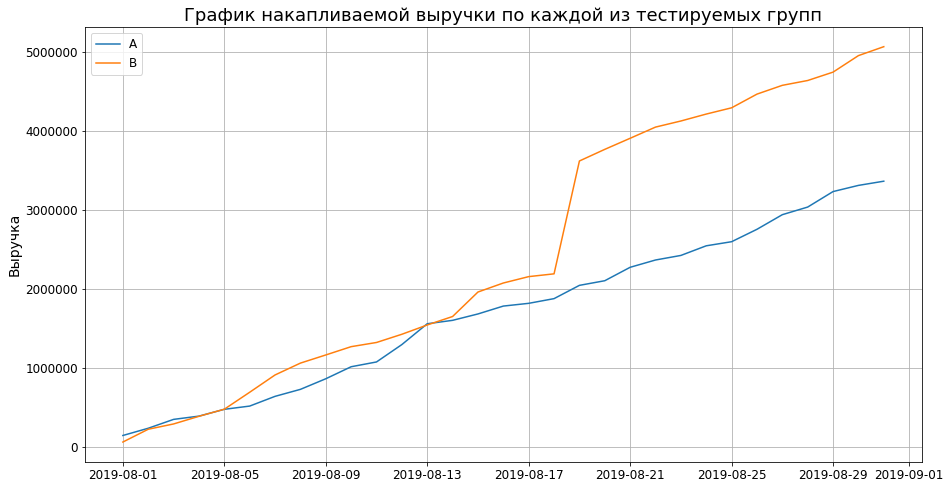

In [29]:
# Строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.title('График накапливаемой выручки по каждой из тестируемых групп', fontsize = 18)
plt.legend()
plt.ylabel('Выручка', fontsize = 14)
plt.grid()

plt.show()

Выручка по группе `А` растёт равномерно в течении всего времени теста, а вот выручка по пользователям в группе `В` в течении второй немного больше группы `А` и сходится на 14 день с группой `A`, а после этого уже выручка группы `В` растёт сильнее в течении следующей недели, особенно сильный скачок 18-19.08.2019 года. Далее, рост выручка в обеих группах равномерен.


In [30]:
# рассмотрим 18-19 августа - даты, когда был скачок выручки
cumulative_date_18_19 = cumulative_data.query('date in ("2019-08-18", "2019-08-19")').groupby('group').sum()
cumulative_date_18_19['mean'] = cumulative_date_18_19['revenue'] / cumulative_date_18_19['orders']
display(cumulative_date_18_19)

,orders,buyers,revenue,visitors,mean
group,,,,,
A,577,547,3921675,22756,6_796.664
B,675,662,5811650,22829,8_609.852


Мы видим, что в эти даты действительно был скачок покупок у группы `B` и не только по выручке, но и по заказам, покупателям и среднему чеку. 

### График кумулятивного среднего чека по группам. Выводы и предположения.

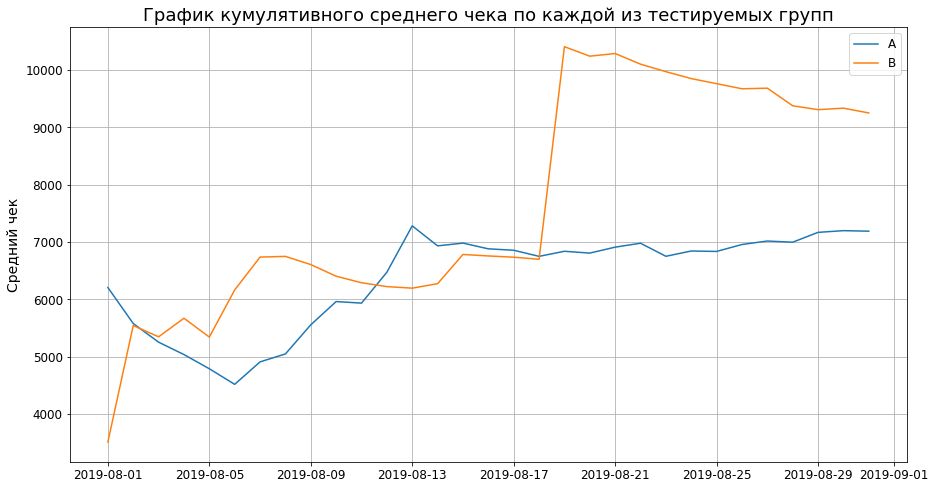

In [31]:
# графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'] /
         cumulative_revenue_a['orders'], label='A')

plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'] / 
         cumulative_revenue_b['orders'], label='B')

plt.title('График кумулятивного среднего чека по каждой из тестируемых групп', fontsize = 18)
plt.legend()
plt.ylabel('Средний чек', fontsize = 14)
plt.grid()

plt.show()

В течении первой недели, кроме первого дня группа В средний чек опережает другую группу, с 11 по 18 августа средний чек группы А немного впереди, а вот с 18 августа опять сильный всплеск два дня среднего чека в группе В, в дальнейшем средний чек идёт на небольшой спад. Средний чек в группе стабилизировался примерно возле 7 000 уже после второй недели теста.

### График относительного изменения кумулятивного среднего чека группы B к группе A. Выводы и предположения.

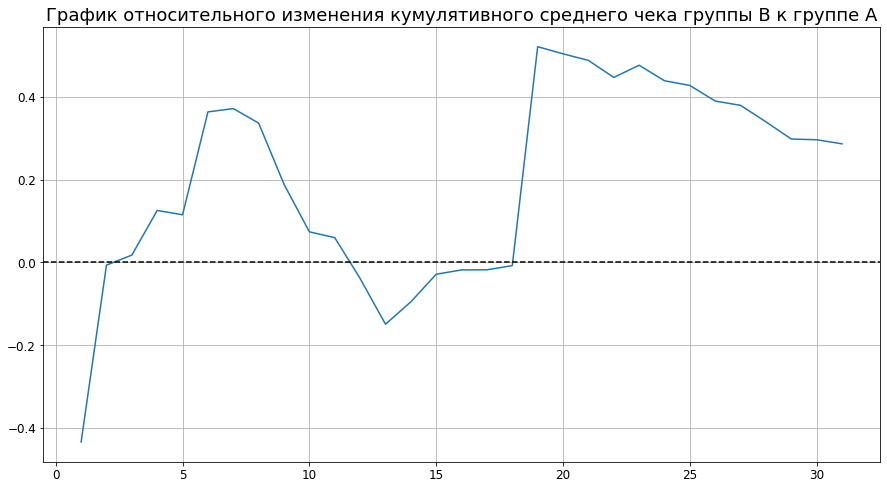

In [32]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = ( cumulative_revenue_a.merge(cumulative_revenue_b,
                                        left_on='date', right_on='date', how='left', suffixes=['_a', '_b']) )

# cтроим отношение средних чеков
( plt.plot(merged_cumulative_revenue['date'].dt.day, 
         ((merged_cumulative_revenue['revenue_b']/merged_cumulative_revenue['orders_b'])
/(merged_cumulative_revenue['revenue_a']/merged_cumulative_revenue['orders_a'])-1 )) )

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize = 18)
plt.grid();

По относительному среднему чеку группа В лидирует за исключением самых первых дней и недели в середине тестирования. Опять сильный скачок на 18 день у группы В относительно группы А, в дальнейшем идёт постепенный отскок, график в конце исследования не стабилизировался.

### График кумулятивной конверсии по группам. Выводы и предположения.

In [33]:
# считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']
# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']

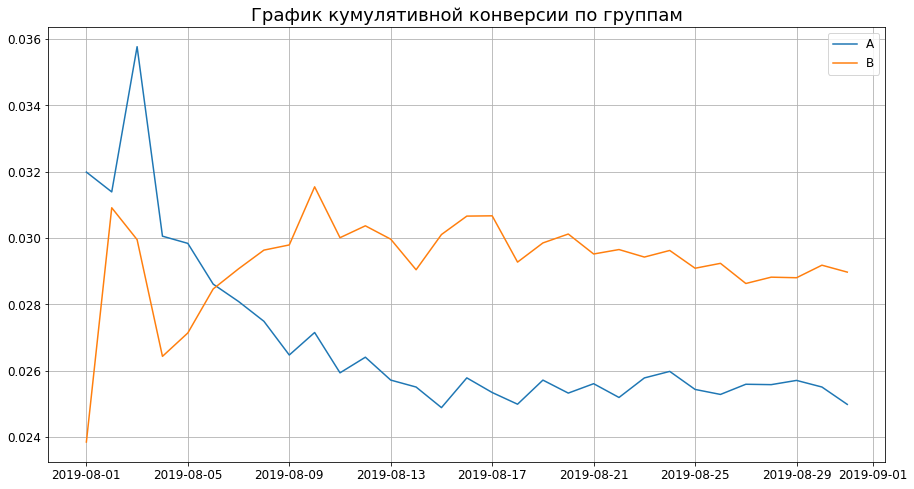

In [34]:
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
# Строим график выручки группы B
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')

plt.title('График кумулятивной конверсии по группам', fontsize = 18)
plt.legend()
plt.grid()

plt.show()

На конец первой недели теста конверсия группы В опережает конверсию группы А и после этого уже в течении несколько дней разность между ними стабилизуется до конца теста, однако сами конверсии параллельно имеют тенденцию на небольшое снижение.

### График относительного изменения кумулятивной конверсии группы B к группе A. Выводы и предположения.

In [35]:
# создаем таблицу конверсий по группам по каждой дате
merged_cumulative_conversions = ( cumulative_data_a[['date','conversion']].
                merge(cumulative_data_b[['date','conversion']],
                on='date', how='left', suffixes=['_a', '_b']) )

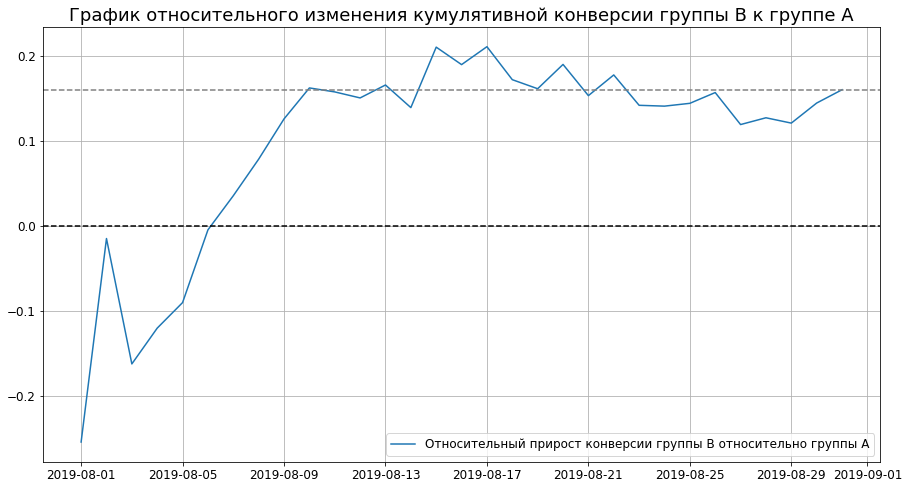

In [36]:
( plt.plot(merged_cumulative_conversions['date'], merged_cumulative_conversions['conversion_b']/
         merged_cumulative_conversions['conversion_a']-1, 
         label="Относительный прирост конверсии группы B относительно группы A") )

plt.title('График относительного изменения кумулятивной конверсии группы B к группе A', fontsize = 18)
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.16, color='grey', linestyle='--')
plt.grid()

plt.show()

В конце первой недели конверсия группы В опережает конвернсию группы А, делая сильный скачок с 5 о 10 августа, а далее примерно стабилизируется около 16% увеличения крнверсии группы В относительно конверсии группы А.

### Точечный график количества заказов по пользователям. Выводы и предположения.

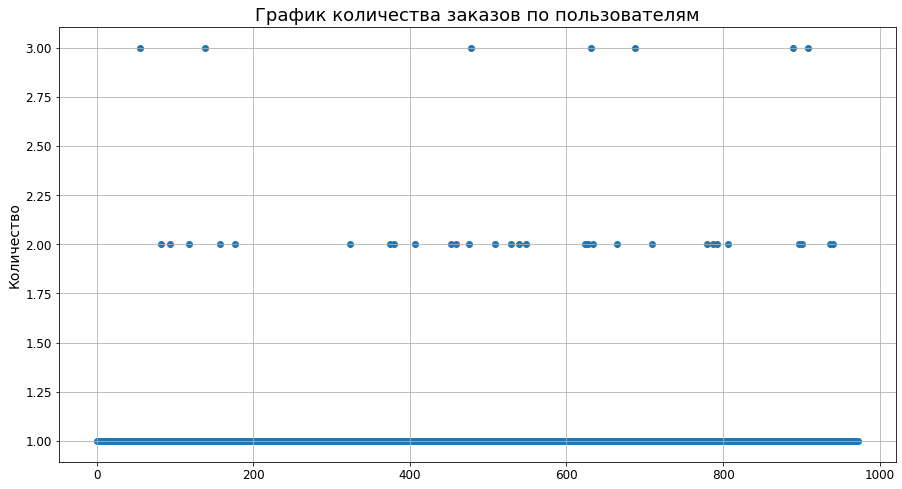

In [37]:
# таблица заказов по Id пользователей
df_orders_by_users = df_orders.groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
df_orders_by_users.columns = ['user_id', 'orders']

plt.scatter(range(0, len(df_orders_by_users)), df_orders_by_users['orders'])

plt.title('График количества заказов по пользователям', fontsize = 18)
plt.ylabel('Количество', fontsize = 14)
plt.grid()

plt.show()

Подавляющее количество заказов 1 раз, есть небольшое количество у кого 2 заказа и совсем редкие случаи 3 заказов.

### 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [38]:
print(f'95 перцентиль составляет {np.percentile(df_orders_by_users["orders"], 95)} заказ(а)')
print(f'99 перцентиль составляет {np.percentile(df_orders_by_users["orders"], 99)} заказ(а)')

95 перцентиль составляет 1.0 заказ(а)
99 перцентиль составляет 2.0 заказ(а)


95% пользователей совершают 1 заказ, 99% совершают один или два заказа.  
В данном случае оптимальнее выбрать аномальных пользователей тех, которые совершают более 2 заказов.

### Точечный график стоимостей заказов. Выводы и предположения.

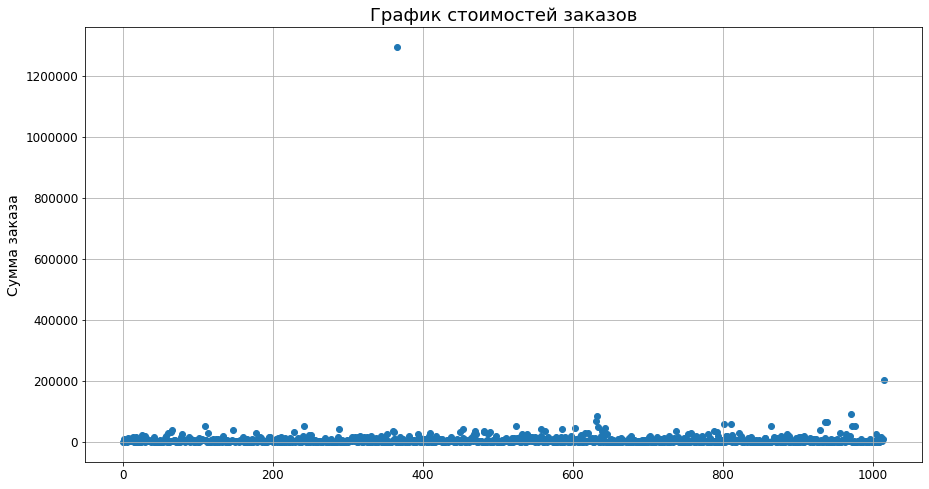

In [39]:
plt.scatter(range(0, len(df_orders)), df_orders['revenue'])

plt.title('График стоимостей заказов', fontsize = 18)
plt.ylabel('Сумма заказа', fontsize = 14)
plt.grid()

plt.show()

Есть очень жирный заказ, который просто огромен, относительно остальных. Остальные заказы все намного меньше.

### 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных пользователей.

In [40]:
print(f'95 перцентиль составляет {np.percentile(df_orders["revenue"], 95)}')
print(f'99 перцентиль составляет {np.percentile(df_orders["revenue"], 99)}')

95 перцентиль составляет 26785.0
99 перцентиль составляет 53904.0


Не более 5% заказов дороже 26785.0 и не более 1% дороже 53904.0.  
Выберем 35 000, как границу аномальных значений стоимости заказов.

### Считаем статистическую значимость различий в конверсии между группами по «сырым» данным. Выводы и предположения.

#### Подготовим данные для исследований

In [41]:
# выбираем всех посетителей по группам на каждую дату
visitors_a_daily = df_visitors[df_visitors['group'] == 'A'][['date', 'visitors']]
visitors_b_daily = df_visitors[df_visitors['group'] == 'B'][['date', 'visitors']]

visitors_a_daily.columns = ['date', 'visitors_per_date_a']
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

# собираем по каждой дате аккумулированное количество посетителей по каждой тестовой группе
visitors_a_cummulative = ( visitors_a_daily.apply(lambda df: visitors_a_daily
            [visitors_a_daily['date'] <= df['date']].
            agg({'date' : 'max', 'visitors_per_date_a' : 'sum'}), 
            axis=1) )

visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

visitors_b_cummulative = ( visitors_b_daily.apply(lambda df: visitors_b_daily
            [visitors_b_daily['date'] <= df['date']].
            agg({'date' : 'max', 'visitors_per_date_b' : 'sum'}), 
            axis=1) )

visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

In [42]:
# выбираем заказы и суммы покупок по каждой группе и дате отдельно
orders_a_daily = ( df_orders[df_orders['group'] == 'A'].
                  groupby('date', as_index=False).
                  agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'}) )
# переименовываем столбцы
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_b_daily = ( df_orders[df_orders['group'] == 'B'].
                  groupby('date', as_index=False).
                  agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'}) )
# переименовываем столбцы
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']


# собираем по каждой дате аккумулированное количество заказов и суммы по заказам по каждой тестовой группе
orders_a_cummulative = ( orders_a_daily.apply(lambda df: orders_a_daily[orders_a_daily['date'] <= df['date']].
        agg({'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}),
        axis=1).
        sort_values(by=['date']) )

orders_a_cummulative.columns = ['date','orders_cummulative_a','revenue_cummulative_a']

# собираем по каждой дате аккумулированное количество заказов и суммы по заказам по каждой тестовой группе
orders_b_cummulative = ( orders_b_daily.apply(lambda df: orders_b_daily[orders_b_daily['date'] <= df['date']].
        agg({'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}),
        axis=1).
        sort_values(by=['date']) )

orders_b_cummulative.columns = ['date','orders_cummulative_b','revenue_cummulative_b']

In [43]:
# соединим все предыдущие таблицы в одну общую
data = (
    orders_a_daily
    .merge(orders_b_daily, left_on='date', right_on='date', how='left')
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


#### Считаем статистическую значимость различий в конверсии между группами по «сырым» данным

In [44]:
# таблицы заказов по Id пользователей по группам тестирования
df_orders_by_users_a = df_orders[df_orders['group'] == 'A'].\
        groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
df_orders_by_users_b = df_orders[df_orders['group'] == 'B'].\
        groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})

df_orders_by_users_a.columns = ['user_id', 'orders']
df_orders_by_users_b.columns = ['user_id', 'orders']

In [45]:
# создадим переменные sample_a и sample_b, в которых пользователям из разных групп будет соответствовать 
# количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. 
# Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.
sample_a = ( pd.concat([df_orders_by_users_a['orders'], # объединяем заказы с нулями для пользователей, которые
            pd.Series(0, index=np.arange(data['visitors_per_date_a']. # ничего не заказывали
            sum() - len(df_orders_by_users_a['orders'])), name='orders')],axis=0) ) # высчитываем количество нулей

sample_b = ( pd.concat([df_orders_by_users_b['orders'], # объединяем заказы с нулями для пользователей, которые
            pd.Series(0, index=np.arange(data['visitors_per_date_b']. # ничего не заказывали
            sum() - len(df_orders_by_users_b['orders'])), name='orders')],axis=0) ) # высчитываем количество нулей

Сформулируем нулевую гипотизу.  
Ho ---> статистически значимых различий в конверсии между группами нет.  
H1 ---> есть статистически значимые различия в конверсии между группами.

In [46]:
# установим альфа
alpha = 0.05
print("p-value конверсии между группами {0:.5f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))

print("Относительный прирост группы В к группе A {0:.2%}".format(sample_b.mean() / sample_a.mean() - 1))

p-value конверсии между группами 0.00551
Относительный прирост группы В к группе A 15.98%


Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный проигрыш группы A равен 15.98% 

### Считаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения.

Сформулируем нулевую гипотизу.
Ho ---> статистически значимых различий в среднем чеке заказа между группами нет.
H1 ---> есть статистически значимые различия в среднем чеке между группами.

In [47]:
# передадим критерию mannwhitneyu() данные о выручке с заказов
print('p-value среднего чека между группами {0:.3f}'.format(stats.mannwhitneyu\
            (df_orders[df_orders['group']=='A']['revenue'], df_orders[df_orders['group']=='B']['revenue'])[1]))

# относительные различия в среднем чеке между группами
print('Относительный прирост группы В к группе A {0:.2%}'.format(df_orders[df_orders['group']=='B']['revenue'].\
            mean()/df_orders[df_orders['group']=='A']['revenue'].mean()-1)) 

p-value среднего чека между группами 0.415
Относительный прирост группы В к группе A 28.66%


Получается, нулевую гипотизу о том, что статистически значимых различий в среднем чеке заказа между группами нет не отвергаем. Хотя, относительный прирост среднего чека в группе В на 28,66% выше, чем в группе А. Могу предположить гипотизу, что на такой высокий прирост повлиял высокий выброс суммы заказа, что мы наблюдали ранее.

### Считаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Выводы и предположения.

Ранее мы обозначили аномальные значения, как такие, что пользователи совершают более 2 заказов или сумма заказа более 35 000.  
Сделаем срезы пользователей с числом заказов больше 2 или суммой заказа более 35 000. Определим такое количество пользователей.

In [48]:
# выбираем пользователей с числом заказов больше 2
users_with_many_orders = pd.concat([df_orders_by_users_a[df_orders_by_users_a['orders'] > 2]['user_id'],
        df_orders_by_users_b[df_orders_by_users_b['orders'] > 2]['user_id'],],
        axis=0)

# выбираем пользователей с суммами заказов больше 35 000
users_with_expensive_orders = df_orders[df_orders['revenue'] > 35_000]['visitor_id']

# объединяем две таблицы с аномальными значениями
abnormal_users = ( pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values() )

print(f'Всего пользователей с аномальными значениями {abnormal_users.shape[0]} человек') 

Всего пользователей с аномальными значениями 37 человек


In [49]:
# формируем выборки с очищенными значениями от аномальных для статистического теста 
sample_a_filtered = ( pd.concat([df_orders_by_users_a[np.logical_not(df_orders_by_users_a['user_id'].
        isin(abnormal_users))]['orders'], pd.Series(0, 
        np.arange(data['visitors_per_date_a'].sum() - len(df_orders_by_users_a['orders'])), name='orders',),],
        axis=0,) )

sample_b_filtered = ( pd.concat([df_orders_by_users_b[np.logical_not(df_orders_by_users_b['user_id'].
        isin(abnormal_users))]['orders'], pd.Series(0, 
        np.arange(data['visitors_per_date_b'].sum() - len(df_orders_by_users_b['orders'])), name='orders',),],
        axis=0,) )

In [55]:
print("p-value конверсии между группами {0:.5f}".format\
      (stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))

print("Относительный прирост группы В к группе A {0:.2%}".\
      format(sample_b_filtered.mean() / sample_a_filtered.mean() - 1)) 

print(f"Относительное изменение конверсии после очистки: {(19.43 - 15.98) / 15.98:.2%} или \
{(19.43 - 15.98):.2f} процентных пункта")

p-value конверсии между группами 0.00350
Относительный прирост группы В к группе A 19.43%
Относительное изменение конверсии после очистки: 21.59% или 3.45 процентных пункта


Нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем, также, как и с сырыми данными.  

### Считаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения.

In [51]:
( print('p-value среднего чека между группами {0:.3f}'.
                format(stats.mannwhitneyu(df_orders[np.logical_and(df_orders['group'] == 'A',
                np.logical_not(df_orders['visitor_id'].isin(abnormal_users)),)]['revenue'],
                df_orders[np.logical_and(df_orders['group'] == 'B',
                np.logical_not(df_orders['visitor_id'].isin(abnormal_users)),)]['revenue'],)[1])) )

( print("Относительный прирост группы В к группе A {0:.2%}".
                format(df_orders[np.logical_and(df_orders['group'] == 'B',
                np.logical_not(df_orders['visitor_id'].isin(abnormal_users)),)]['revenue'].mean()
                / df_orders[np.logical_and(df_orders['group'] == 'A',
                np.logical_not(df_orders['visitor_id'].isin(abnormal_users)),)]['revenue'].mean()- 1)) )

p-value среднего чека между группами 0.435
Относительный прирост группы В к группе A 0.33%


p-value среднего чека практически не изменился, а отношение среднего чека между группами практичски выровнялось после удаления аномальных значений, как мы и предполагали ранее.

### Строим график кумулятивного среднего чека по каждой из тестируемых групп без аномальных значений

In [52]:
# создаем таблицу с агрегированными кумулятивными по дням данные о заказах
# без пользователей с аномальными значениями
orders_aggregates_filtered = ( dates_groups.apply(lambda df:
        df_orders.query('visitor_id not in @abnormal_users') 
                # функция собирает все записи до определенной даты с разбивкой по группам и в агрегации
                  # считаем куммулятивные данные по числу покупок, покупателей и сумму покупок 
        [np.logical_and(df_orders['date'] <= df['date'], df_orders['group'] == df['group'])].
        agg({'date' : 'max', 'group' : 'max', # включаем дату и группу в таблицу таким способом
        'transaction_id' : 'nunique', # отбираем все покупки в таблицу
        'revenue' : 'sum'}), # отбираем в таблицу сумму покупки
        axis=1). # применяем методы к каждой строке
        sort_values(by=['date','group']) )

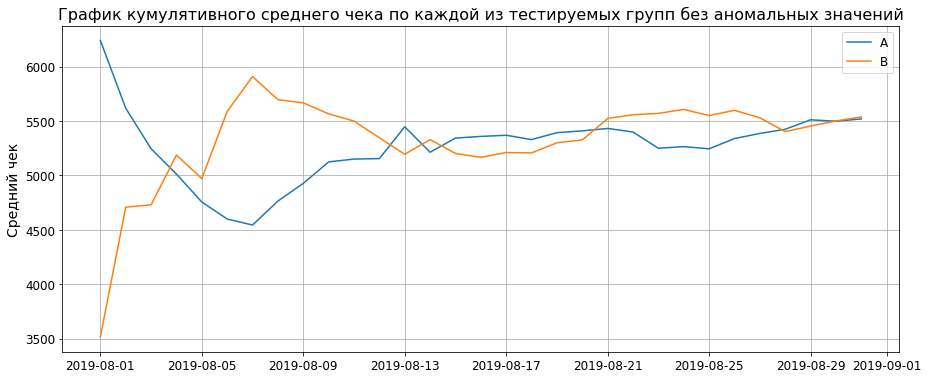

In [53]:
# графики среднего чека по группам без аномальных значений
plt.figure(figsize=(15, 6))

( plt.plot(orders_aggregates_filtered.query('group == "A"')['date'], 
         orders_aggregates_filtered.query('group == "A"')['revenue'] /
         orders_aggregates_filtered.query('group == "A"')['transaction_id'], label='A') )

( plt.plot(orders_aggregates_filtered.query('group == "B"')['date'], 
         orders_aggregates_filtered.query('group == "B"')['revenue'] /
         orders_aggregates_filtered.query('group == "B"')['transaction_id'], label='B') )

plt.title('График кумулятивного среднего чека по каждой из тестируемых групп без аномальных значений', 
          fontsize = 16)
plt.legend()
plt.ylabel('Средний чек', fontsize = 14)
plt.grid()

plt.show()

## Выводы по тесту

Имеющиеся факты:  
- Есть статистически значимые различия по конверсии между группами как по «сырым», так и по очищенным данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия конверсии между группами сообщает, что результаты группы А хуже группы В и нет тенденции к улучшению:

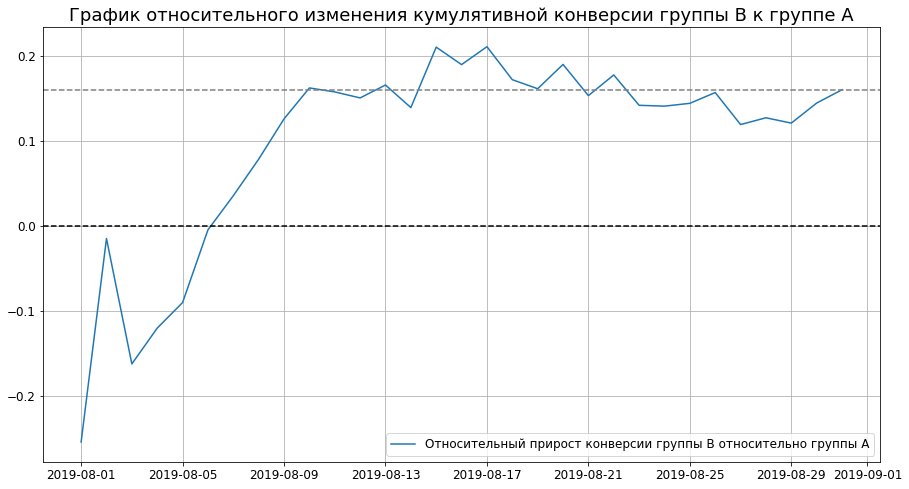  

- График различия среднего чека говорит о том, что результаты группы B и А после начала второй недели эксперимента начали стабилизироваться к друг другу в районе 5 500):

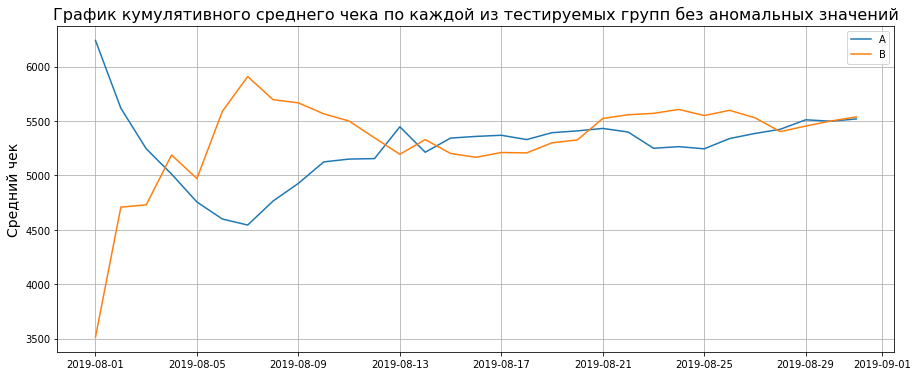

**Исходя из обнаруженных фактов, тест следует остановить и признать его успешным, если для нас успех теста был в увеличении конверсии.  
Если успех выражается в увеличении конверсии больше определенного числа, тогда надо отталкиваться от этого числа.  Если согласно теста проверялась гипотиза увеличения среднего чека, тогда также продолжать тест нет никакого смысла, потому как вероятность, что при имеющихся данных сегмент B на самом деле лучше сегмента A — практически нулевая.**